# Visual Encoding with Matplotlib
## Zexi Han

### Notebook Prep

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# from jupyterthemes import jtplot
# jtplot.style(theme='monokai')

### Data Import

In [2]:
pokemon = pd.read_csv("pokemon.csv")

In [3]:
pokemon.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [10]:
pokemon.describe(include='all')

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
count,800.000000,800,800,414,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000,800
unique,NaN,800,18,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,Palkia,Water,Flying,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
freq,NaN,1,112,97,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,735
mean,362.813750,NaN,NaN,NaN,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375,NaN
std,208.343798,NaN,NaN,NaN,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129,NaN
min,1.000000,NaN,NaN,NaN,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000,NaN
25%,184.750000,NaN,NaN,NaN,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000,NaN
50%,364.500000,NaN,NaN,NaN,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000,NaN
75%,539.250000,NaN,NaN,NaN,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000,NaN


### Visualizations with Matplotlib

I choose Attack attribute to visualize.

#### Visualization 1

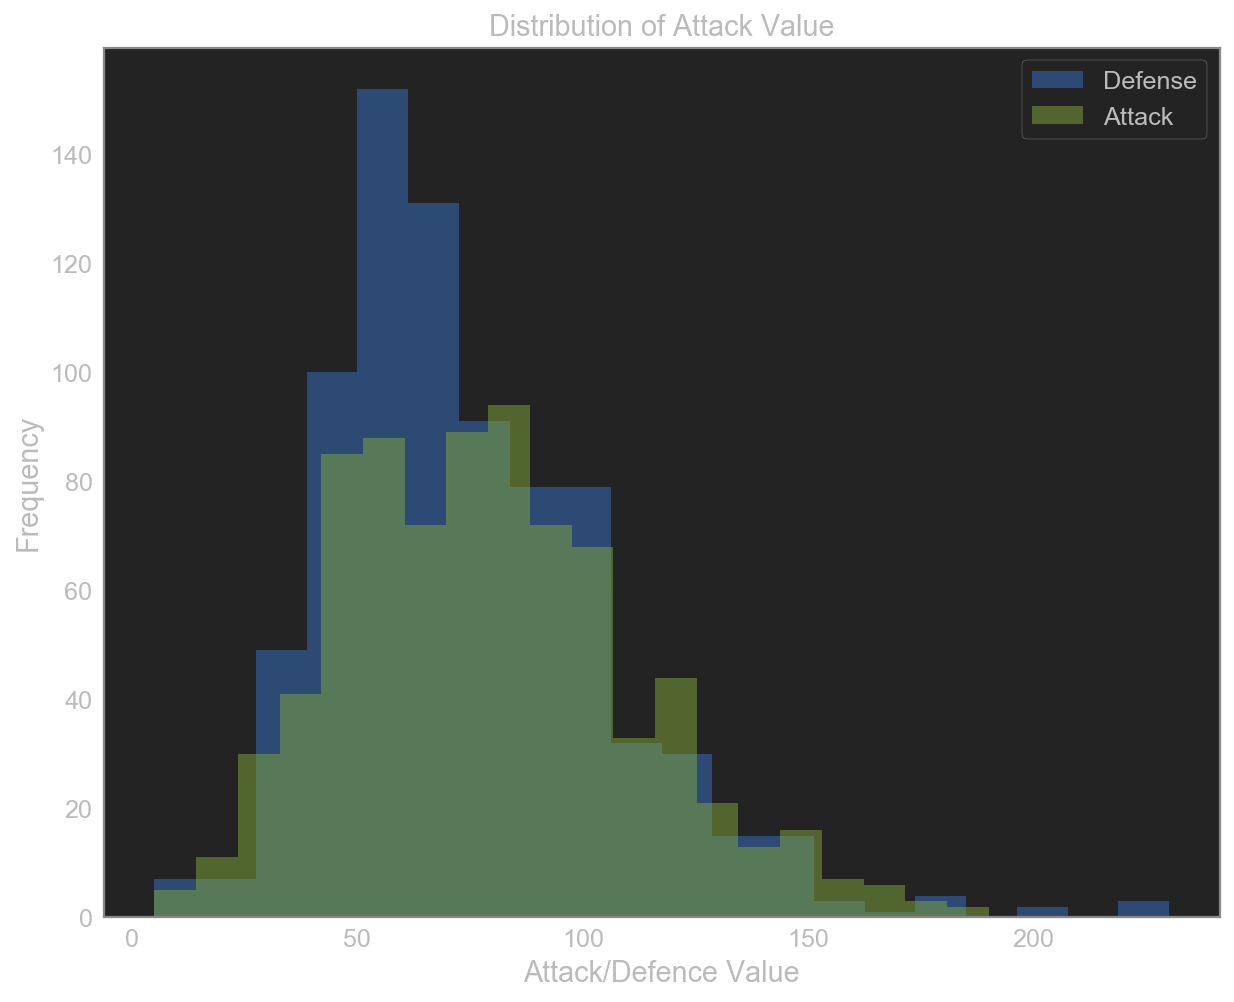

In [38]:
x = pokemon.Defense
y = pokemon.Attack

plt.figure(figsize=(10, 8))
plt.hist(x, bins=20, alpha=0.5, label='Defense')
plt.hist(y, bins=20, alpha=0.5, label='Attack')
plt.legend(loc='upper right')
plt.xlabel("Attack/Defense Value")
plt.ylabel("Frequency")
plt.title("Distribution of Attack/Defense Value")
plt.grid(False)

In the first visualization, I want to plot the distribution of both Attack and Defense attributes of the pokemons to have an overview and make a comparison. For this task, I gave up using scatterplot, which encodes two quantitative attributes using point marks and both vertical and horizontal spatial position. Owing to the strong interference of 800 points crowded on a small piece of plot, we may not get valuable insight from it.

However, the above histogram is an accurate representation of the distribution of the numeric data. It encodes bin and its corresponding frequency with the vertical spatial position for the quantitative frequency, and the horizontal spatial position channel for the bins which are consecutive, non-overlapping intervals of Attack attribute. Histograms allow viewers to easily compare data, and in addition, they scale well to large ranges of information. But it is difficult to extract total amount of input from the histogram, such as how many pokemons are included in the data .

Ref. Visualization Analysis and Design, 5.3 Defining Marks and Channels

#### Visualization 2

In [5]:
pokemon.Generation.unique()

array([1, 2, 3, 4, 5, 6])

Text(0.5, 1.0, 'Attack Value Distribution wrt Generation')

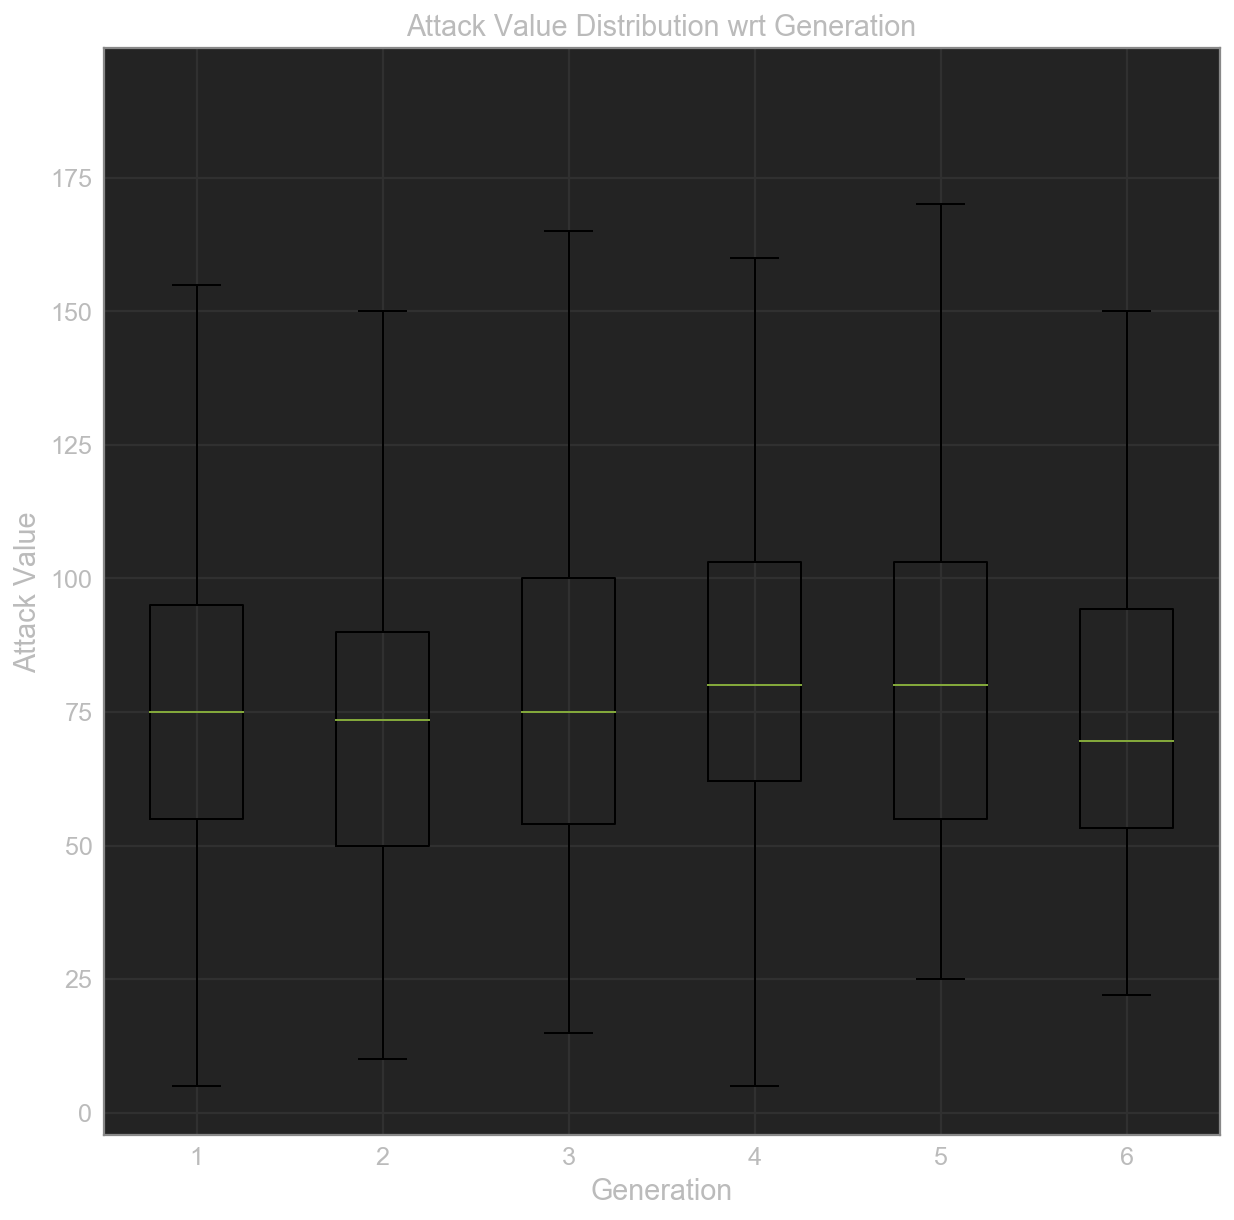

In [40]:
data_to_plot = [pokemon["Attack"][pokemon["Generation"] == 1], 
                pokemon["Attack"][pokemon["Generation"] == 2], 
                pokemon["Attack"][pokemon["Generation"] == 3],
                pokemon["Attack"][pokemon["Generation"] == 4],
                pokemon["Attack"][pokemon["Generation"] == 5],
                pokemon["Attack"][pokemon["Generation"] == 6]]

fig, ax = plt.subplots(1,1, figsize=(10,10))

bp = ax.boxplot(data_to_plot)

ax.set_xlabel("Generation")
ax.set_ylabel("Attack Value")
ax.set_title("Attack Value Distribution wrt Generation")

In the second visualization, I try to see if there is a positive correlation between the Attack value and the Generation. The naive approach is to crate a barchart which encodes the average Attack value with vertical spatial position and encodes the categorical Generatin with horizontal spatial position. I didn't use it because only the average value is not sufficient to answer my question.

Therefore, boxplot is created as an upgrade replacement of the barchart. It encodes the range of Attack value with the height of the box, and also represent the average Attack value using the vertical spatial position of a horizontal line. By employing a combination of channels, it displays the distribution of data based on a five number summary (“minimum”, first quartile (Q1), median, third quartile (Q3), and “maximum”). When I need to have information on the variability or dispersion of the data, boxplot can give me a good indication of how the values in the data are spread out. However, it is hard to identify the original data from it.

Ref. Visualization Analysis and Design, 5.4 Using Marks and Channels

#### Conclusion

I prefer the second visualization. Although the frequency of value interval is missing in the boxplot compared to the histogram, it still conveys the distribution of the data by showing five number summary which is more accurate to describe the distribution. Besides, it allows us to make comparison of the distribution among more categories with non-overlapping boxes, i.e. better separability. I like boxplot also because it uses both length and position channels to encode different aspect of data summary. In a word, boxplot is pretty neat.

Ref. Visualization Analysis and Design, 5.5 Channel Effectiveness